In [3]:
# https://medium.com/@hirok4/python-implementation-of-ellipse-fitting-e8801dbb16a8

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '..\\..\\HDF5')
from HDF5 import *
from matplotlib.patches import Ellipse
from ellipse import LsqEllipse

In [5]:
# dictionary = load_hdf5_to_dict('..\\amplitrixCASA_IQMixer.hdf5')
dictionary = load_hdf5_to_dict("I:\\Il mio Drive\\Università\\UniMiB - Archivio di Federico Shin'ichi Finardi\\02_Magistrale\\Laboratorio di Criogenia\\data\\panciaut-FAC_SIMILE\\amplitrixCASA_IQMixer.hdf5")
power = 'p05'
freq  = 'f05'

I = np.array(dictionary[power]['freqs'][freq]['I']).reshape(len(dictionary[power]['freqs'][freq]['I']))
Q = np.array(dictionary[power]['freqs'][freq]['Q']).reshape(len(dictionary[power]['freqs'][freq]['Q']))

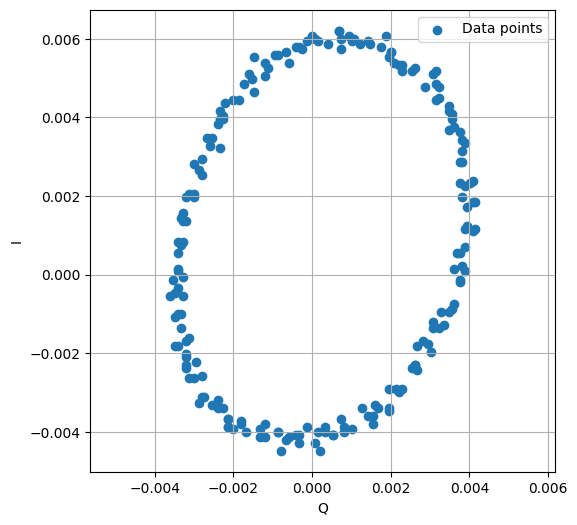

In [13]:
# Plot the noisy data
cln_pts = 50                # clean points for I-Q plane
I =  I[cln_pts:-cln_pts]
Q =  Q[cln_pts:-cln_pts]

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.scatter(Q, I, label = 'Data points')

plt.xlabel('Q')
plt.ylabel('I')
plt.grid()
plt.legend()
plt.show()

center	: (0.000, 0.001)
width	: 0.005
height	: 0.004
phi	: 1.317
-----------------------------
a	: -0.861819045401019
b	: 0.22774752158881711
c	: -0.4532096638358759
d	: 0.00019276838833976796
f	: 0.0007533091866765878
g	: 1.1149882387495222e-05
-----------------------------


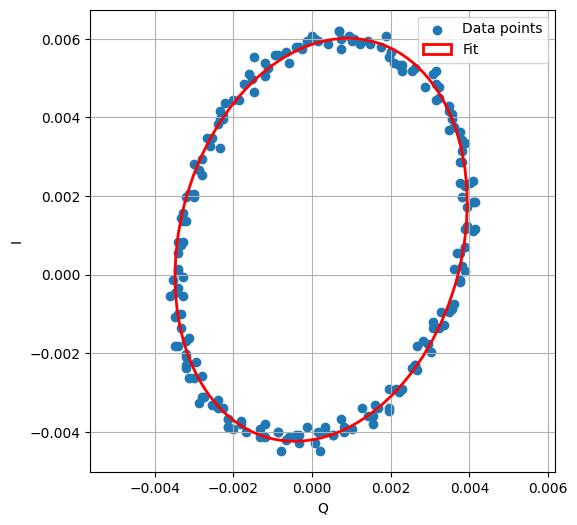

In [24]:
# https://github.com/ehtec/least-squares-ellipse-fitting/blob/master/ellipse.py

import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

X = np.array(list(zip(Q, I)))
reg = LsqEllipse().fit(X)
center, width, height, phi = reg.as_parameters()
a, b, c, d, f, g = reg.coefficients

print(f'center	: ({center[0]:.3f}, {center[1]:.3f})')
print(f'width	: {width:.3f}')
print(f'height	: {height:.3f}')
print(f'phi	: {phi:.3f}')
print('-----------------------------')
print(f'a	: {a}')
print(f'b	: {b}')
print(f'c	: {c}')
print(f'd	: {d}')
print(f'f	: {f}')
print(f'g	: {g}')
print('-----------------------------')

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
ax.axis('equal')
ax.scatter(Q, I, zorder=1, label = 'Data points')
ellipse = Ellipse(
    xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
    edgecolor='r', fc='None', lw=2, label='Fit', zorder=2
)
ax.add_patch(ellipse)

plt.xlabel('Q')
plt.ylabel('I')
plt.grid()
plt.legend()
plt.show()

In [25]:
# # Traslation and rotation
# q = Q-center[0]
# i = I -center[1]
# q_rot = i * np.sin(phi) + q*np.cos(phi)
# i_rot = i*np.cos(phi) - q*np.sin(phi)
# plt.scatter(q_rot, i_rot)

In [26]:
rho = np.sqrt(np.abs(g))

QS_V = [64/99.985, 48/70.784, 36/50.111]           #QuickSyn Voltage
media = (QS_V[0] + QS_V[1] + QS_V[2])/3

print(rho)

0.0033391439602831175


# NOTE
**Coefficiente g:** 
Pare venire sempre la metà di I.

**Shit Fact:** 
I e Q non hanno stessa ampiezza nella presa dati